# Anticipez les besoins en consommation électrique de bâtiments

    Lien vers consignes : https://openclassrooms.com/fr/projects/629/assignment

    Lien vers données : https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv

    Lien vers score Star Energy : https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/interpret-your-results/what

    Lien vers la signification des colonnes (trouvé via recherche web) : https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 200)
# pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', -1)

In [2]:
data_2015=pd.read_csv('2015-building-energy-benchmarking.csv')
data_2016=pd.read_csv('2016-building-energy-benchmarking.csv')

In [3]:
print('data_2015: ', data_2015.shape)
print('data_2016: ', data_2016.shape)

data_2015:  (3340, 47)
data_2016:  (3376, 46)


# Analyse des colonnes

In [4]:
data_2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [5]:
set_2015=set(list(data_2015.columns))
set_2016=set(list(data_2016.columns))

union=list(set_2015 | set_2016)
inter=list(set_2015 & set_2016)

not_same=list(set(union)-set(inter))
not_same_tup=[]
for c in not_same:
    if c in data_2015.columns:
        not_same_tup.append((c,'2015'))
    if c in data_2016.columns:
        not_same_tup.append((c,'2016'))

years = set(map(lambda x:x[1], not_same_tup))
[[c for c in not_same_tup if c[1]==y] for y in years]

[[('GHGEmissions(MetricTonsCO2e)', '2015'),
  ('Comment', '2015'),
  ('SPD Beats', '2015'),
  ('Seattle Police Department Micro Community Policing Plan Areas', '2015'),
  ('GHGEmissionsIntensity(kgCO2e/ft2)', '2015'),
  ('City Council Districts', '2015'),
  ('Location', '2015'),
  ('OtherFuelUse(kBtu)', '2015'),
  ('Zip Codes', '2015'),
  ('2010 Census Tracts', '2015')],
 [('Latitude', '2016'),
  ('ZipCode', '2016'),
  ('City', '2016'),
  ('Comments', '2016'),
  ('Longitude', '2016'),
  ('Address', '2016'),
  ('TotalGHGEmissions', '2016'),
  ('State', '2016'),
  ('GHGEmissionsIntensity', '2016')]]

In [6]:
data_2015[['SPD Beats','OtherFuelUse(kBtu)','Zip Codes','City Council Districts','Seattle Police Department Micro Community Policing Plan Areas','2010 Census Tracts']]

,SPD Beats,OtherFuelUse(kBtu),Zip Codes,City Council Districts,Seattle Police Department Micro Community Policing Plan Areas,2010 Census Tracts
0,31.0,0.0,18081,NaN,14.0,NaN
1,31.0,0.0,18081,NaN,14.0,NaN
2,31.0,0.0,18081,NaN,56.0,NaN
3,31.0,0.0,18081,NaN,56.0,NaN
4,31.0,0.0,19576,NaN,56.0,NaN
...,...,...,...,...,...,...
3335,16.0,0.0,18379,NaN,26.0,NaN
3336,38.0,0.0,18383,NaN,60.0,NaN
3337,7.0,0.0,19576,NaN,56.0,NaN
3338,48.0,0.0,18792,NaN,55.0,NaN


# Jonction des 2 datasets

In [7]:
data=pd.concat([data_2015[inter],data_2016[inter]],axis=0)

In [8]:
data_2015.rename(columns={'GHGEmissionsIntensity(kgCO2e/ft2)': 'GHGEmissionsIntensity',
                          'GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions' 
                         },inplace=True)

In [9]:
col_co2=['GHGEmissionsIntensity','TotalGHGEmissions']

d15_co2=data_2015[col_co2]
d16_co2=data_2016[col_co2]

data_co2=pd.concat([d15_co2,d16_co2],axis=0)
data=pd.concat([data,data_co2],axis=1)
data_co2

,GHGEmissionsIntensity,TotalGHGEmissions
0,2.64,249.43
1,2.38,263.51
2,1.92,2061.48
3,31.38,1936.34
4,4.02,507.70
...,...,...
3371,1.70,20.94
3372,2.01,32.17
3373,16.99,223.54
3374,1.57,22.11


In [10]:
data_2015[['Location']]

,Location
0,"{'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{""address"": ""405 OLIVE WAY"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}"
1,"{'latitude': '47.61310583', 'longitude': '-122.33335756', 'human_address': '{""address"": ""724 PINE ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}"
2,"{'latitude': '47.61334897', 'longitude': '-122.33769944', 'human_address': '{""address"": ""1900 5TH AVE"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}"
3,"{'latitude': '47.61421585', 'longitude': '-122.33660889', 'human_address': '{""address"": ""620 STEWART ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}"
4,"{'latitude': '47.6137544', 'longitude': '-122.3409238', 'human_address': '{""address"": ""401 LENORA ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98121""}'}"
...,...
3335,"{'latitude': '47.59950256', 'longitude': '-122.32034302', 'human_address': '{""address"": ""321 10TH AVE S"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98104""}'}"
3336,"{'latitude': '47.65752471', 'longitude': '-122.3160159', 'human_address': '{""address"": ""4123 12TH AVE NE"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98105""}'}"
3337,"{'latitude': '47.61649845', 'longitude': '-122.33770787', 'human_address': '{""address"": ""2030 8TH AVE"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98121""}'}"
3338,"{'latitude': '47.68396954', 'longitude': '-122.2874088', 'human_address': '{""address"": ""3801 NE 77TH ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98115""}'}"


In [11]:
d15_loc=data_2015['Location'].str.split(",",expand=True)

d15_loc.rename(columns={0: "Latitude", 1: "Longitude", 2: "Address", 3: "City", 4: "State", 5: "ZipCode"}, inplace=True)

d15_loc.loc[:,'Latitude']=d15_loc.loc[:,'Latitude'].map(lambda x: x.lstrip("{'latitude': '").rstrip("'")).astype(float)
d15_loc.loc[:,'Longitude']=d15_loc.loc[:,'Longitude'].map(lambda x: x.lstrip("'longitude': '").rstrip("'")).astype(float)
d15_loc.loc[:,'State']=d15_loc.loc[:,'State'].map(lambda x: x.lstrip("\"state\": \"").rstrip("\""))
d15_loc.loc[:,'Address']=d15_loc.loc[:,'Address'].map(lambda x: x.lstrip("'human_address': \'{\"address\": \"").rstrip("\""))
d15_loc.loc[:,'City']=d15_loc.loc[:,'City'].map(lambda x: x.lstrip("\"city\": \"").rstrip("\""))
d15_loc.loc[:,'ZipCode']=d15_loc.loc[:,'ZipCode'].map(lambda x: x.lstrip("\"zip\": \"").rstrip("\"}'}")).astype(int)

col_loc=d15_loc.columns

d16_loc=data_2016[col_loc]

data_loc=pd.concat([d15_loc,d16_loc],axis=0)
data_loc.loc[:,['ZipCode']]=data_loc.loc[:,['ZipCode']].astype('int64',errors='ignore')

data=pd.concat([data,data_loc],axis=1)
data_loc

,Latitude,Longitude,Address,City,State,ZipCode
0,47.612190,-122.337997,405 OLIVE WAY,SEATTLE,WA,98101.0
1,47.613106,-122.333358,724 PINE ST,SEATTLE,WA,98101.0
2,47.613349,-122.337699,1900 5TH AVE,SEATTLE,WA,98101.0
3,47.614216,-122.336609,620 STEWART ST,SEATTLE,WA,98101.0
4,47.613754,-122.340924,401 LENORA ST,SEATTLE,WA,98121.0
...,...,...,...,...,...,...
3371,47.567220,-122.311540,1600 S Dakota St,Seattle,WA,NaN
3372,47.596250,-122.322830,719 8th Ave S,Seattle,WA,NaN
3373,47.636440,-122.357840,1920 1st Ave W,Seattle,WA,NaN
3374,47.528320,-122.324310,8319 8th Ave S,Seattle,WA,NaN


In [12]:
data.set_index('OSEBuildingID',inplace=True)
data.index = data.index.map(str)

data.shape

(6716, 44)

# Analyse de l'utilisation des bâtiments

In [13]:
list(data.columns)

['PropertyGFATotal',
 'SiteEUI(kBtu/sf)',
 'ComplianceStatus',
 'Electricity(kWh)',
 'LargestPropertyUseType',
 'Electricity(kBtu)',
 'DataYear',
 'SiteEnergyUse(kBtu)',
 'DefaultData',
 'YearBuilt',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'TaxParcelIdentificationNumber',
 'ENERGYSTARScore',
 'PrimaryPropertyType',
 'NumberofFloors',
 'NaturalGas(therms)',
 'Outlier',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'NumberofBuildings',
 'YearsENERGYSTARCertified',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'CouncilDistrictCode',
 'Neighborhood',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'SiteEUIWN(kBtu/sf)',
 'SiteEnergyUseWN(kBtu)',
 'NaturalGas(kBtu)',
 'BuildingType',
 'SteamUse(kBtu)',
 'PropertyName',
 'LargestPropertyUseTypeGFA',
 'ListOfAllPropertyUseTypes',
 'GHGEmissionsIntensity',
 'TotalGHGEmissions',
 'Latitude',
 'Longitude',
 'Address',
 'City',
 'State',
 'ZipCode']

In [14]:
data[['LargestPropertyUseTypeGFA','PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)']]

,LargestPropertyUseTypeGFA,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s)
OSEBuildingID,,,,
1,88434.0,88434,0,88434
2,83880.0,103566,15064,88502
3,757243.0,961990,0,961990
5,61320.0,61320,0,61320
8,123445.0,119890,12460,107430
...,...,...,...,...
50222,12294.0,12294,0,12294
50223,16000.0,16000,0,16000
50224,7583.0,13157,0,13157


In [15]:
data[['LargestPropertyUseTypeGFA','PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)']].isnull().sum()

LargestPropertyUseTypeGFA    156
PropertyGFATotal             0  
PropertyGFAParking           0  
PropertyGFABuilding(s)       0  
dtype: int64

In [16]:
data['LargestPropertyUseTypeGFA'].fillna(data['PropertyGFATotal'],inplace=True)

In [17]:
data[['LargestPropertyUseType','PrimaryPropertyType','ListOfAllPropertyUseTypes']]

,LargestPropertyUseType,PrimaryPropertyType,ListOfAllPropertyUseTypes
OSEBuildingID,,,
1,Hotel,Hotel,Hotel
2,Hotel,Hotel,"Hotel, Parking, Restaurant"
3,Hotel,Hotel,"Hotel, Parking, Swimming Pool"
5,Hotel,Hotel,Hotel
8,Hotel,Hotel,"Hotel, Parking, Swimming Pool"
...,...,...,...
50222,Office,Office,Office
50223,Other - Recreation,Other,Other - Recreation
50224,Other - Recreation,Other,"Fitness Center/Health Club/Gym, Other - Recreation, Swimming Pool"


In [18]:
data[['LargestPropertyUseType','PrimaryPropertyType','ListOfAllPropertyUseTypes']].isnull().sum()

LargestPropertyUseType       156
PrimaryPropertyType          0  
ListOfAllPropertyUseTypes    136
dtype: int64

In [19]:
data['LargestPropertyUseType'].fillna(data['PrimaryPropertyType'],inplace=True)

In [20]:
# On retire les colonnes inutiles, et les valeurs mesurées qui ne sont pas intrinsèques
# aux bâtiments (les consommations en électricité etc...)
columns_to_drop=['City','State','ZipCode','Address','TaxParcelIdentificationNumber',
                 'PropertyName','ListOfAllPropertyUseTypes','PrimaryPropertyType','DefaultData',
                 'PropertyGFAParking','PropertyGFABuilding(s)',
                 'SiteEUIWN(kBtu/sf)','NaturalGas(kBtu)','Electricity(kWh)','Electricity(kBtu)',
                 'SteamUse(kBtu)','NaturalGas(therms)','SourceEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)',
                 'SiteEnergyUseWN(kBtu)','SiteEUI(kBtu/sf)','GHGEmissionsIntensity'
                ]

data.drop(columns_to_drop,axis=1,inplace=True)
data.sort_values(by=['DataYear'],inplace=True)

In [21]:
data 

,PropertyGFATotal,ComplianceStatus,LargestPropertyUseType,DataYear,SiteEnergyUse(kBtu),YearBuilt,ENERGYSTARScore,NumberofFloors,Outlier,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,NumberofBuildings,YearsENERGYSTARCertified,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,CouncilDistrictCode,Neighborhood,BuildingType,LargestPropertyUseTypeGFA,TotalGHGEmissions,Latitude,Longitude
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,
1,88434,Compliant,Hotel,2015,6981428.000,1927,65.0,12.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,7,DOWNTOWN,NonResidential,88434.0,249.43,47.612190,-122.337997
24746,63998,Compliant,Senior Care Community,2015,4107827.000,1988,47.0,4.0,NaN,Parking,0.0,1.0,NaN,NaN,NaN,3,CENTRAL,Multifamily LR (1-4),63998.0,147.69,47.618052,-122.309796
24750,24084,Compliant,Low-Rise Multifamily,2015,632932.000,1920,85.0,3.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,3,CENTRAL,Multifamily LR (1-4),24084.0,15.24,47.618724,-122.309219
24752,439604,Compliant,Multifamily Housing,2015,5903033.000,2004,99.0,6.0,NaN,Other,53952.0,1.0,NaN,NaN,NaN,3,CENTRAL,Multifamily MR (5-9),186618.0,167.31,47.617957,-122.302882
24758,24248,Compliant,Self-Storage Facility,2015,108795.000,1962,NaN,1.0,NaN,Parking,3230.0,1.0,NaN,NaN,NaN,3,CENTRAL,NonResidential,21018.0,0.78,47.612465,-122.316296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20985,26400,Compliant,Other - Recreation,2016,452612.500,1970,NaN,1.0,NaN,Non-Refrigerated Warehouse,7200.0,1.0,NaN,NaN,NaN,2,GREATER DUWAMISH,NonResidential,20560.0,3.16,47.551680,-122.324590
20986,27680,Compliant,Non-Refrigerated Warehouse,2016,1778431.750,1968,NaN,1.0,NaN,Office,2680.0,1.0,NaN,NaN,NaN,2,GREATER DUWAMISH,NonResidential,25000.0,64.81,47.550490,-122.323820
20987,25872,Compliant,Office,2016,1787119.000,1969,NaN,2.0,NaN,Non-Refrigerated Warehouse,2600.0,1.0,NaN,NaN,NaN,2,GREATER DUWAMISH,NonResidential,23272.0,45.79,47.551450,-122.326350


# Valeurs uniques

In [22]:
for column in data.columns:
    if data[column].nunique()<20:
        print('Colonne {}, valeurs uniques :\n\n{}\n'.format(column, data[column].unique()))
    else:
        print('Colonne {}, {} valeurs uniques\n'.format(column, data[column].nunique()))

Colonne PropertyGFATotal, 3297 valeurs uniques

Colonne ComplianceStatus, valeurs uniques :

['Compliant' 'Not Compliant' 'Error - Correct Default Data'
 'Non-Compliant' 'Missing Data']

Colonne LargestPropertyUseType, 65 valeurs uniques

Colonne DataYear, valeurs uniques :

[2015 2016]

Colonne SiteEnergyUse(kBtu), 6679 valeurs uniques

Colonne YearBuilt, 113 valeurs uniques

Colonne ENERGYSTARScore, 100 valeurs uniques

Colonne NumberofFloors, 50 valeurs uniques

Colonne Outlier, valeurs uniques :

[nan 'High Outlier' 'Low Outlier' 'Low outlier' 'High outlier']

Colonne SecondLargestPropertyUseType, 50 valeurs uniques

Colonne SecondLargestPropertyUseTypeGFA, 1434 valeurs uniques

Colonne NumberofBuildings, valeurs uniques :

[  1.   2.   6.  10.   7.   3.  11.   4.  16.  39.   0.   9.  nan   5.
  14.  23. 111.   8.  27.]

Colonne YearsENERGYSTARCertified, 116 valeurs uniques

Colonne ThirdLargestPropertyUseType, 45 valeurs uniques

Colonne ThirdLargestPropertyUseTypeGFA, 531 valeurs

In [23]:
data['Outlier'].replace('High outlier','High Outlier',inplace=True)
data['Outlier'].replace('Low outlier','Low Outlier',inplace=True)
data['Outlier'].replace(np.nan,'No',inplace=True)

In [24]:
data['Neighborhood'].replace('Central', 'CENTRAL', inplace=True)
data['Neighborhood'].replace('Ballard', 'BALLARD', inplace=True)
data['Neighborhood'].replace('North', 'NORTH', inplace=True)
data['Neighborhood'].replace('Northwest', 'NORTHWEST', inplace=True)
data['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)
data['Neighborhood'].replace('Delridge', 'DELRIDGE', inplace=True)

In [25]:
data['ComplianceStatus'].replace('Non-Compliant','Not Compliant',inplace=True)
data['ComplianceStatus'].replace('Missing Data','Unknown',inplace=True)
data['ComplianceStatus'].replace('Error - Correct Default Data','Unknown',inplace=True)

In [26]:
# Impossible qu'un building ne contienne 0 bâtiment ou étage...
data['NumberofBuildings'].replace(0,1,inplace=True)
data['NumberofFloors'].replace(0,1,inplace=True)

In [27]:
for column in data.select_dtypes(['object']).columns:
    print(column,'\n')
    print(data[column].value_counts())
    print('\n')

ComplianceStatus 

Compliant        6548
Unknown          128 
Not Compliant    40  
Name: ComplianceStatus, dtype: int64


LargestPropertyUseType 

Multifamily Housing                                     3265
Office                                                  977 
Non-Refrigerated Warehouse                              398 
K-12 School                                             275 
Other                                                   209 
                                                       ...  
Courthouse                                              2   
Personal Services (Health/Beauty, Dry Cleaning, etc)    2   
Convention Center                                       2   
Hospital                                                1   
Outpatient Rehabilitation/Physical Therapy              1   
Name: LargestPropertyUseType, Length: 65, dtype: int64


Outlier 

No              6600
Low Outlier     61  
High Outlier    55  
Name: Outlier, dtype: int64


SecondLargestPropert

# Analyse des NaN

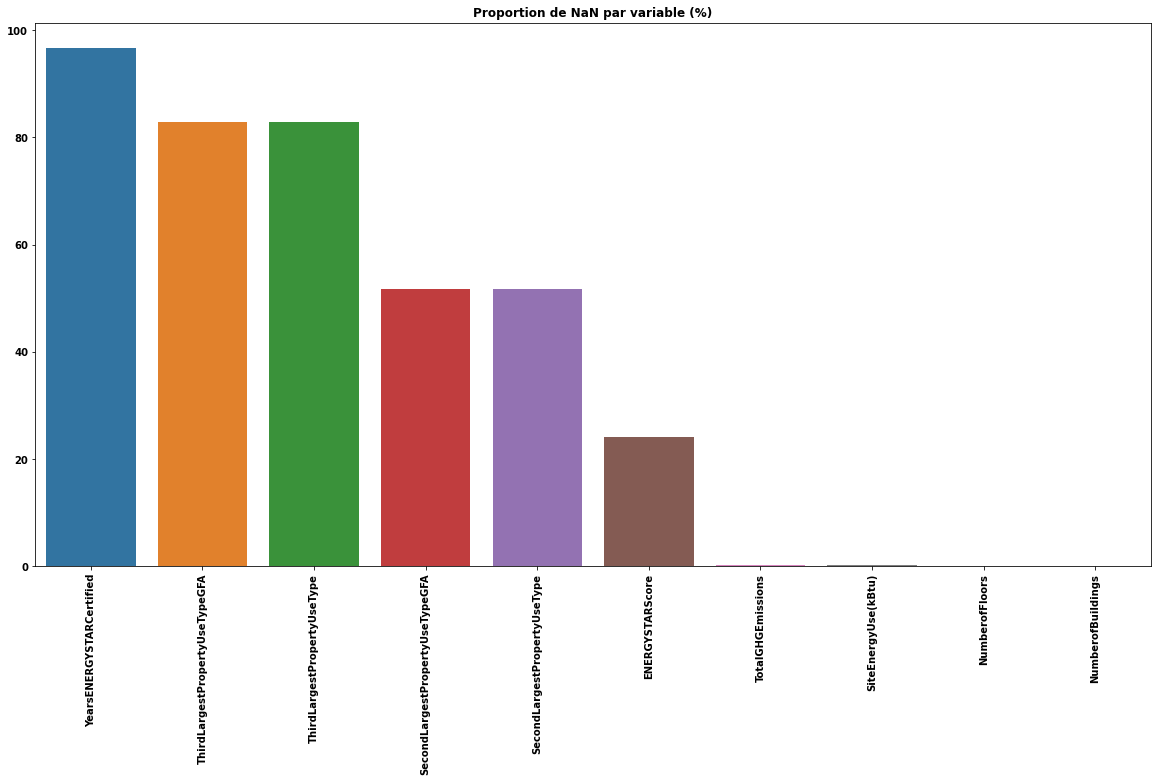

In [28]:
data_nan = data.isna().sum().sort_values(ascending=False)
data_nan = data_nan[data_nan>0]

plt.figure(figsize=(20,10))
plt.title('Proportion de NaN par variable (%)')
plt.xticks(rotation=90)
sns.barplot(x=data_nan.index, y=100*data_nan.values/data.shape[0])

In [29]:
# On retire les 5 premières colonnes car elles contiennent trop de nan et ne nous fournissent
# pas beaucoup plus d'informations sur les bâtiments 
data.drop(columns=data_nan.index[:5],axis=1,inplace=True)

In [30]:
data.isna().sum()

PropertyGFATotal             0   
ComplianceStatus             0   
LargestPropertyUseType       0   
DataYear                     0   
SiteEnergyUse(kBtu)          15  
YearBuilt                    0   
ENERGYSTARScore              1623
NumberofFloors               8   
Outlier                      0   
NumberofBuildings            8   
CouncilDistrictCode          0   
Neighborhood                 0   
BuildingType                 0   
LargestPropertyUseTypeGFA    0   
TotalGHGEmissions            19  
Latitude                     0   
Longitude                    0   
dtype: int64

In [31]:
# On retire les quelques bâtiments où l'on ne connaît pas le nombre de pièces et de buildings
data.dropna(subset=['NumberofFloors','NumberofBuildings'],inplace=True)

In [32]:
data.shape

(6700, 17)

# Type des données

In [33]:
data.dtypes

PropertyGFATotal             int64  
ComplianceStatus             object 
LargestPropertyUseType       object 
DataYear                     int64  
SiteEnergyUse(kBtu)          float64
YearBuilt                    int64  
ENERGYSTARScore              float64
NumberofFloors               float64
Outlier                      object 
NumberofBuildings            float64
CouncilDistrictCode          int64  
Neighborhood                 object 
BuildingType                 object 
LargestPropertyUseTypeGFA    float64
TotalGHGEmissions            float64
Latitude                     float64
Longitude                    float64
dtype: object

In [34]:
to_int_cols=['NumberofBuildings','NumberofFloors']
data.loc[:,to_int_cols]=data.loc[:,to_int_cols].astype('int64')
data.dtypes

PropertyGFATotal             int64  
ComplianceStatus             object 
LargestPropertyUseType       object 
DataYear                     int64  
SiteEnergyUse(kBtu)          float64
YearBuilt                    int64  
ENERGYSTARScore              float64
NumberofFloors               int64  
Outlier                      object 
NumberofBuildings            int64  
CouncilDistrictCode          int64  
Neighborhood                 object 
BuildingType                 object 
LargestPropertyUseTypeGFA    float64
TotalGHGEmissions            float64
Latitude                     float64
Longitude                    float64
dtype: object

# Etude comparée entre les bâtiments de 2015 et 2016

In [35]:
# Nombre de bâtiments communs aux 2 années
(data.index.value_counts()==2).sum()

3269

In [36]:
# Comparaison des bâtiments d'une année à une autre
data_conso15=data[data['DataYear']==2015].loc[data.index[data.index.duplicated()],['SiteEnergyUse(kBtu)']]
data_conso16=data[data['DataYear']==2016].loc[data.index[data.index.duplicated()],['SiteEnergyUse(kBtu)']]

print('Nombre de NaN 2015:\n\n',data_conso15.isnull().sum(),'\n')
print('Nombre de NaN 2016:\n\n',data_conso16.isnull().sum(),'\n')

data_conso15.dropna(inplace=True)
data_conso16.dropna(inplace=True)

Nombre de NaN 2015:

 SiteEnergyUse(kBtu)    8
dtype: int64 

Nombre de NaN 2016:

 SiteEnergyUse(kBtu)    0
dtype: int64 



In [37]:
data_conso15.loc[data_conso15['SiteEnergyUse(kBtu)'] == 0., ['SiteEnergyUse(kBtu)']]

,SiteEnergyUse(kBtu)
OSEBuildingID,
765,0.0
58,0.0


In [38]:
data_conso15_=data_conso15.loc[data_conso15['SiteEnergyUse(kBtu)']!=0.] # on retire les zéros pour la division
data_diff_percentage=100*(data_conso15_-data_conso16)/data_conso15_
data_diff_percentage.dropna(inplace=True)

In [39]:
data_diff_percentage.shape

(3259, 1)

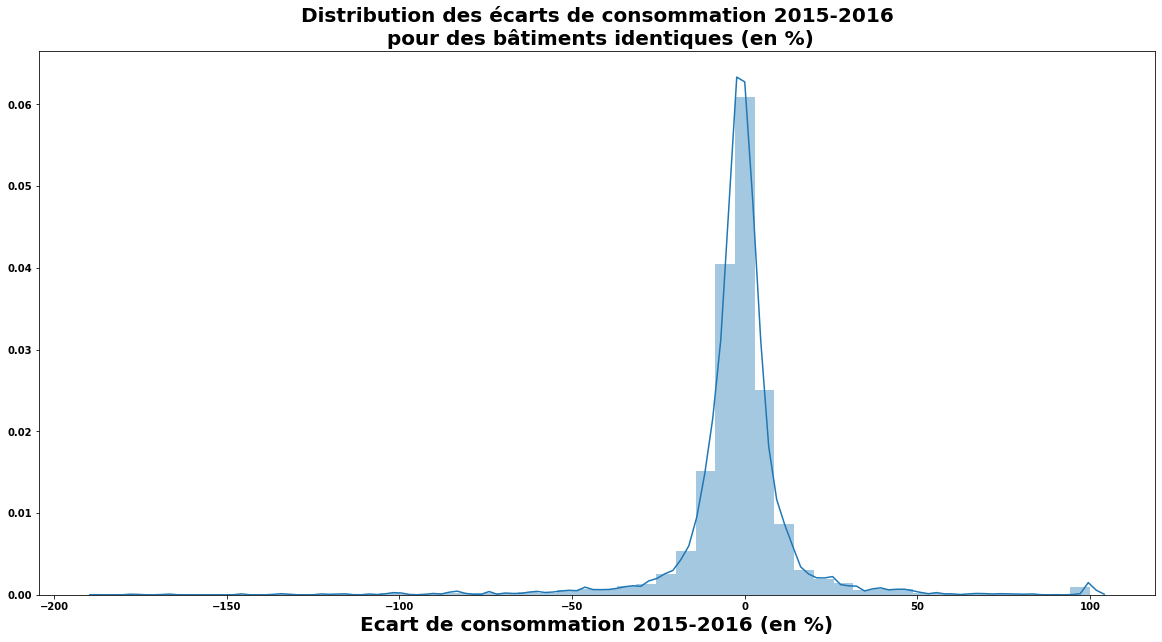

In [40]:
plt.figure(figsize=(20,10))
plt.title('Distribution des écarts de consommation 2015-2016\n pour des bâtiments identiques (en %)',fontsize=20)
sns.distplot(data_diff_percentage[(data_diff_percentage['SiteEnergyUse(kBtu)']>=-200)])
plt.xlabel('Ecart de consommation 2015-2016 (en %)',fontsize=20)
plt.show()

# Analyse univariée

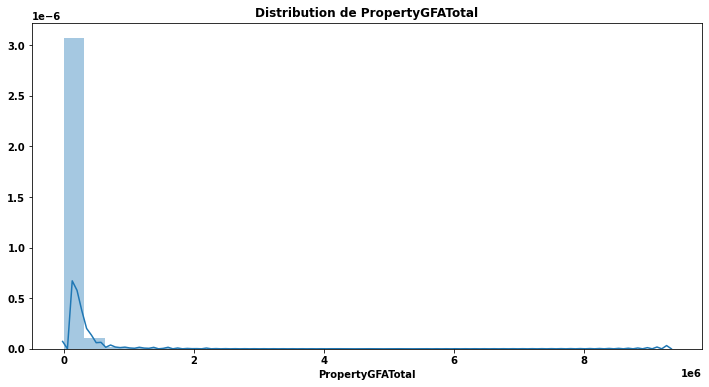

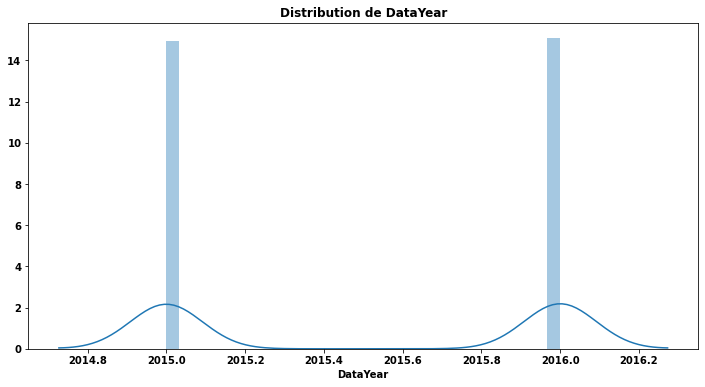

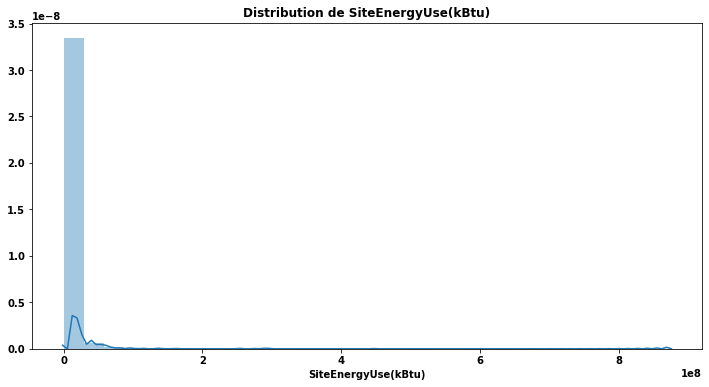

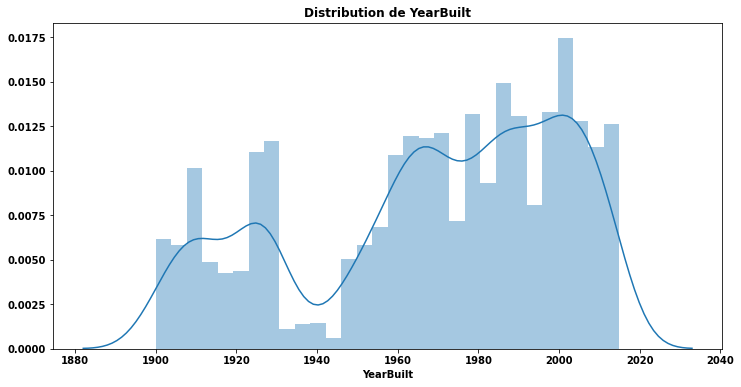

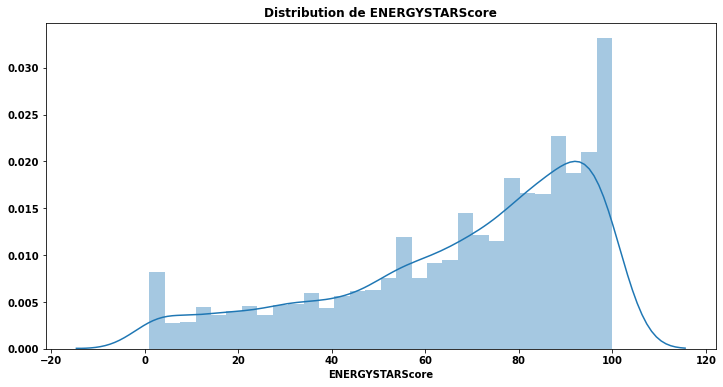

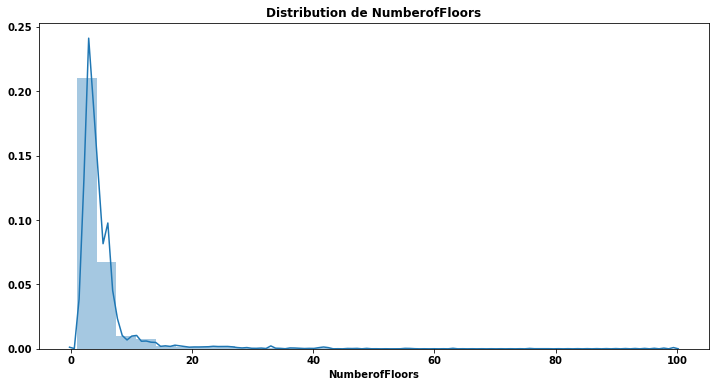

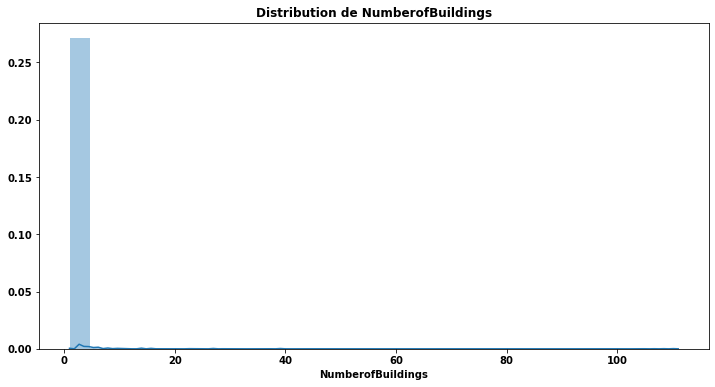

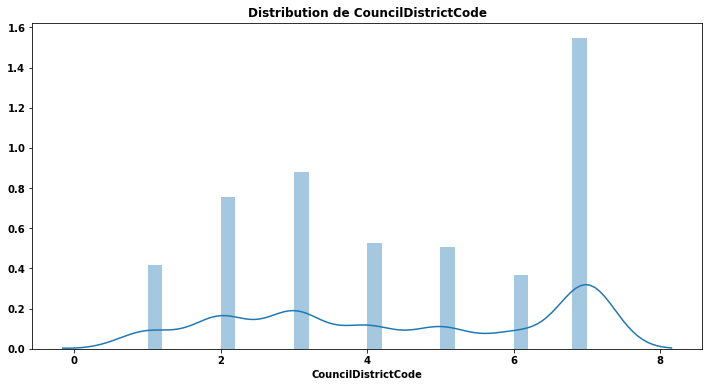

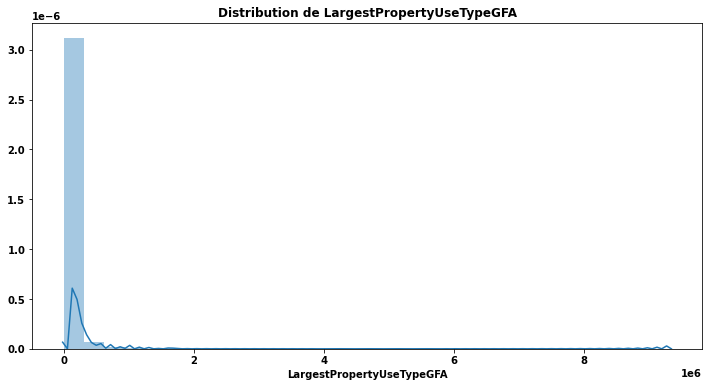

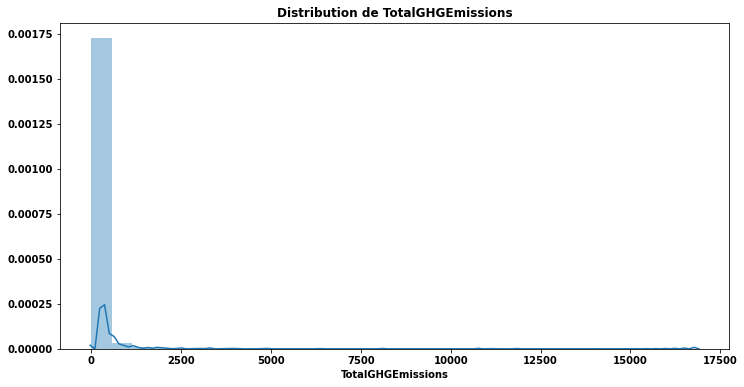

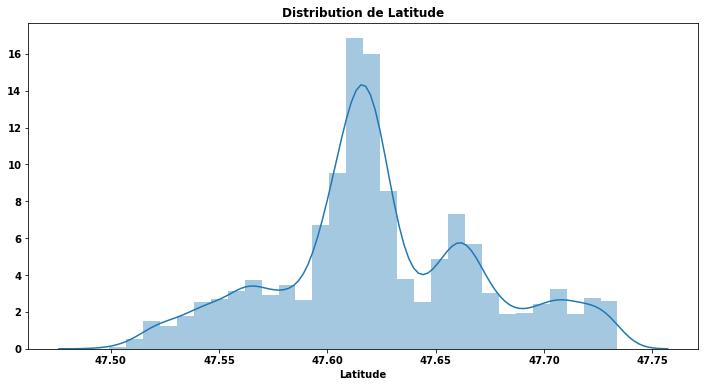

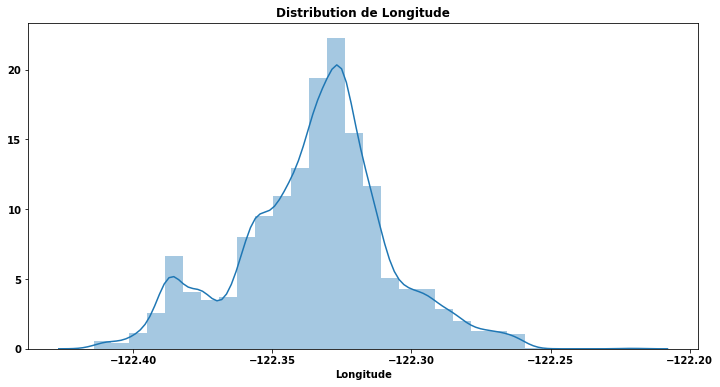

In [41]:
for column in data.select_dtypes(['int64', 'float64']).columns:
    plt.figure(figsize=(12,6))
    plt.title('Distribution de ' + column)
    sns.distplot(data[column].dropna(), bins=30)
    plt.show()

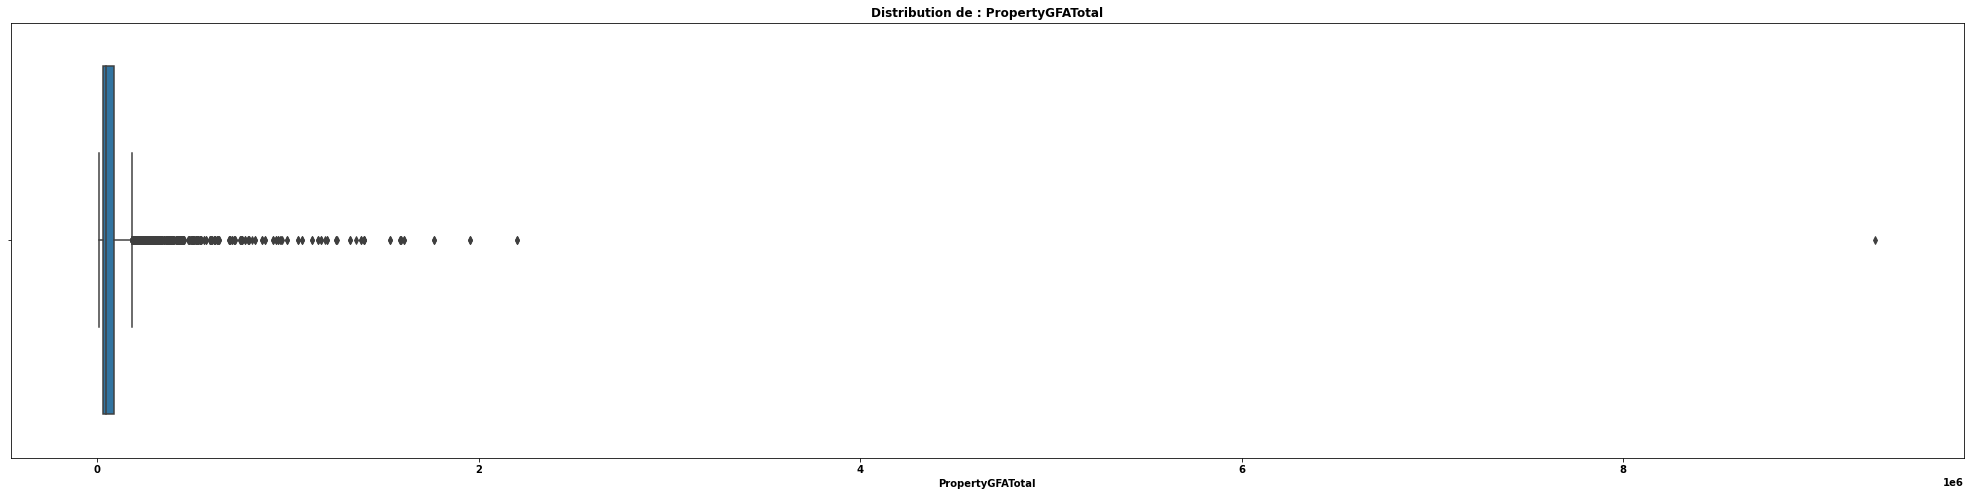

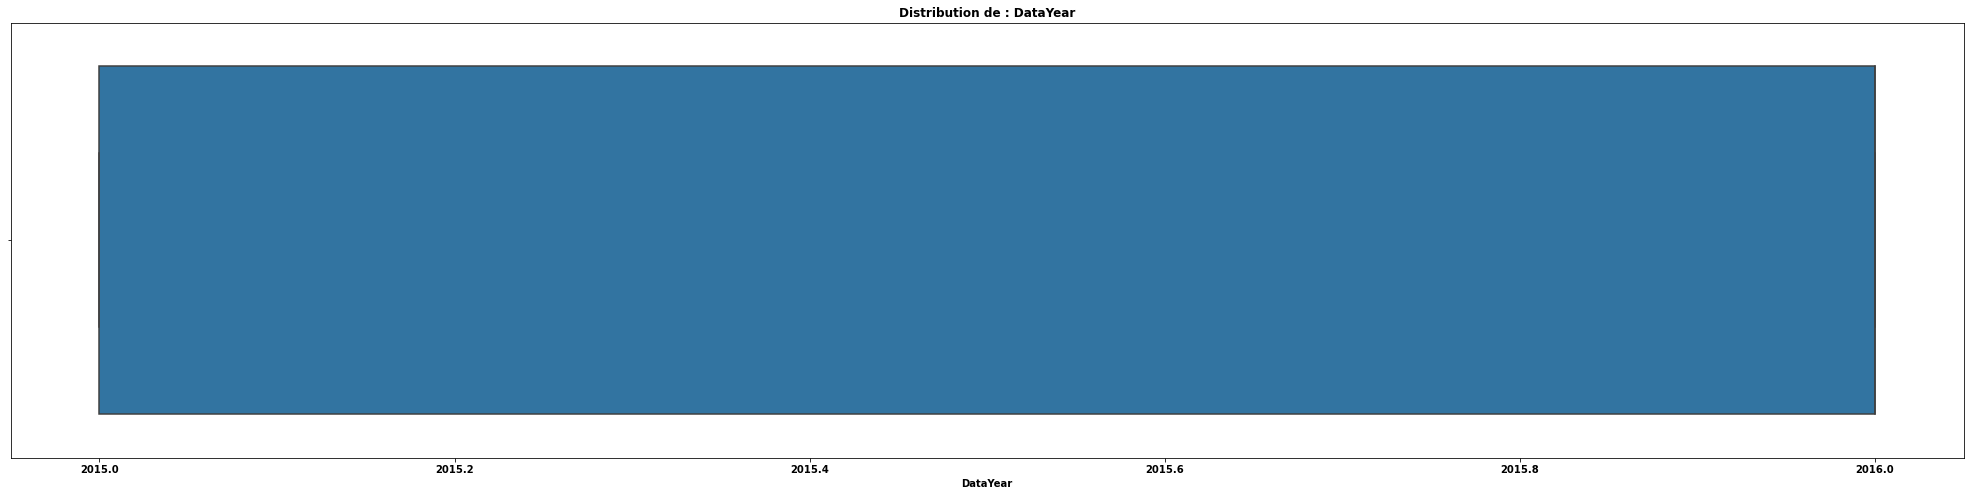

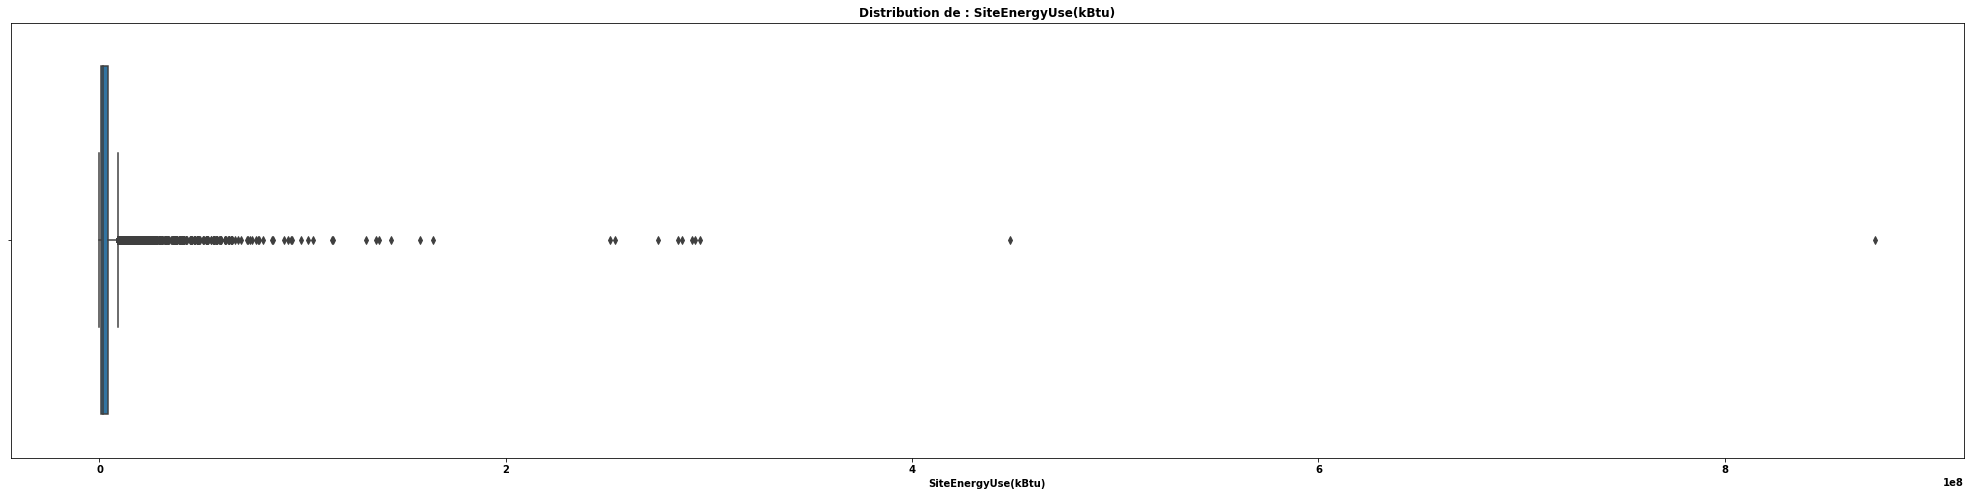

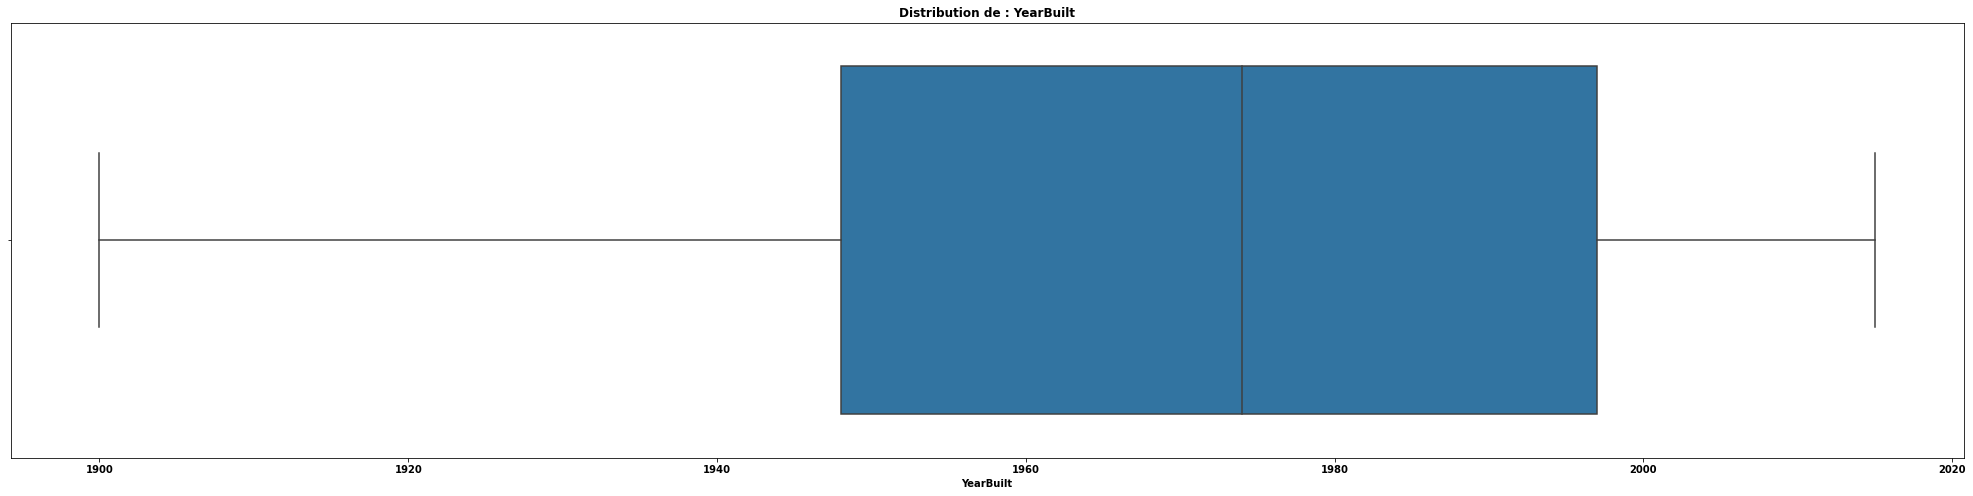

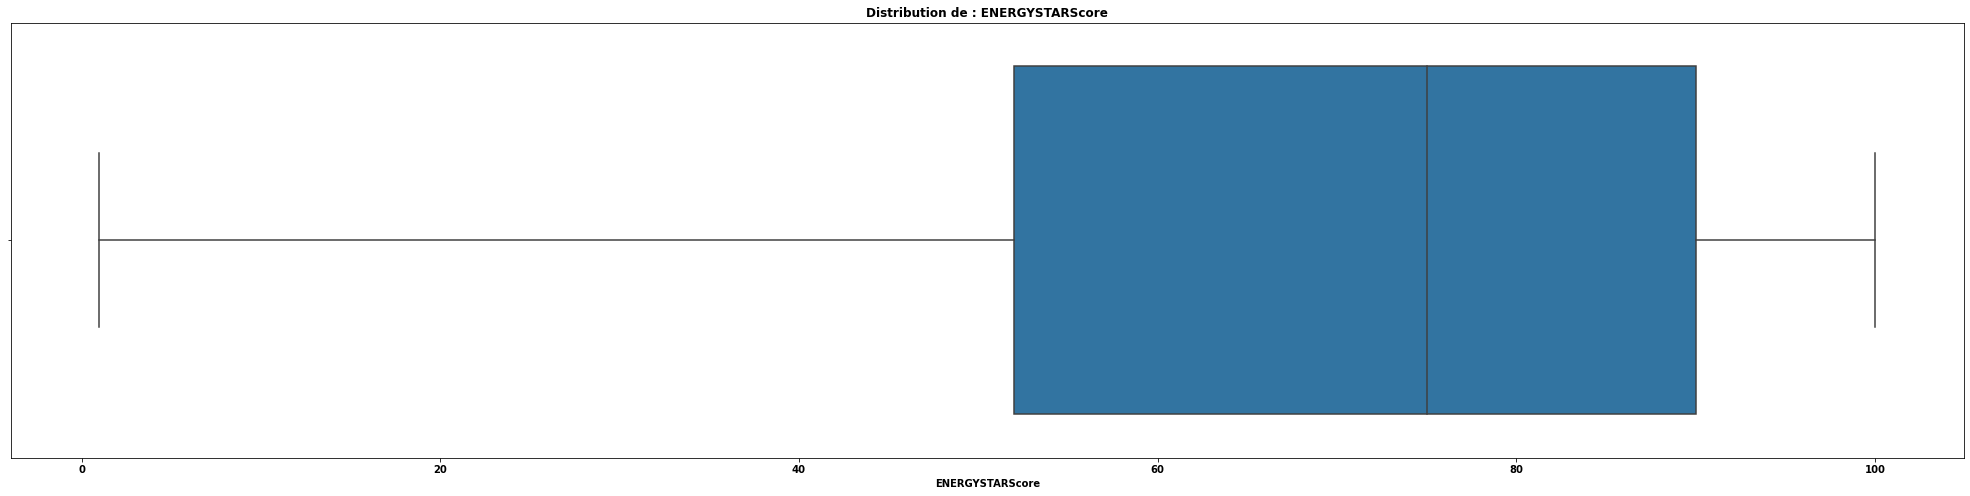

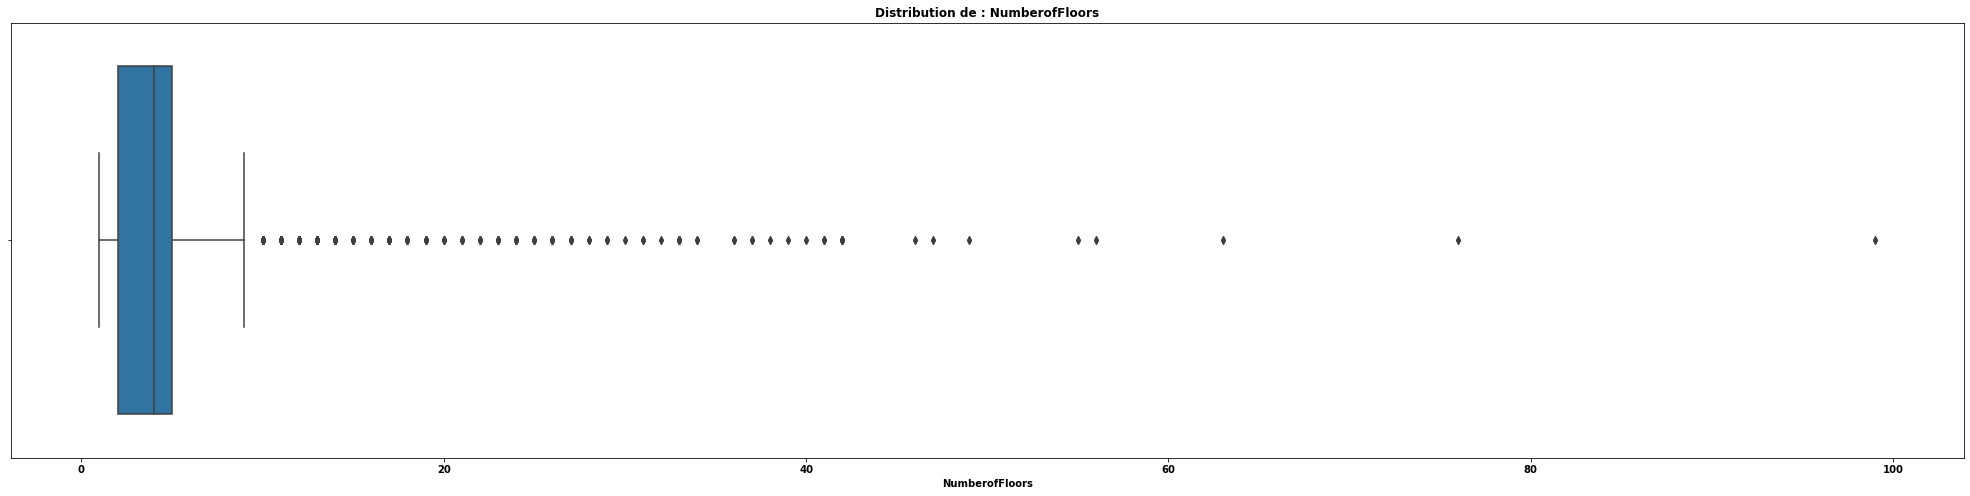

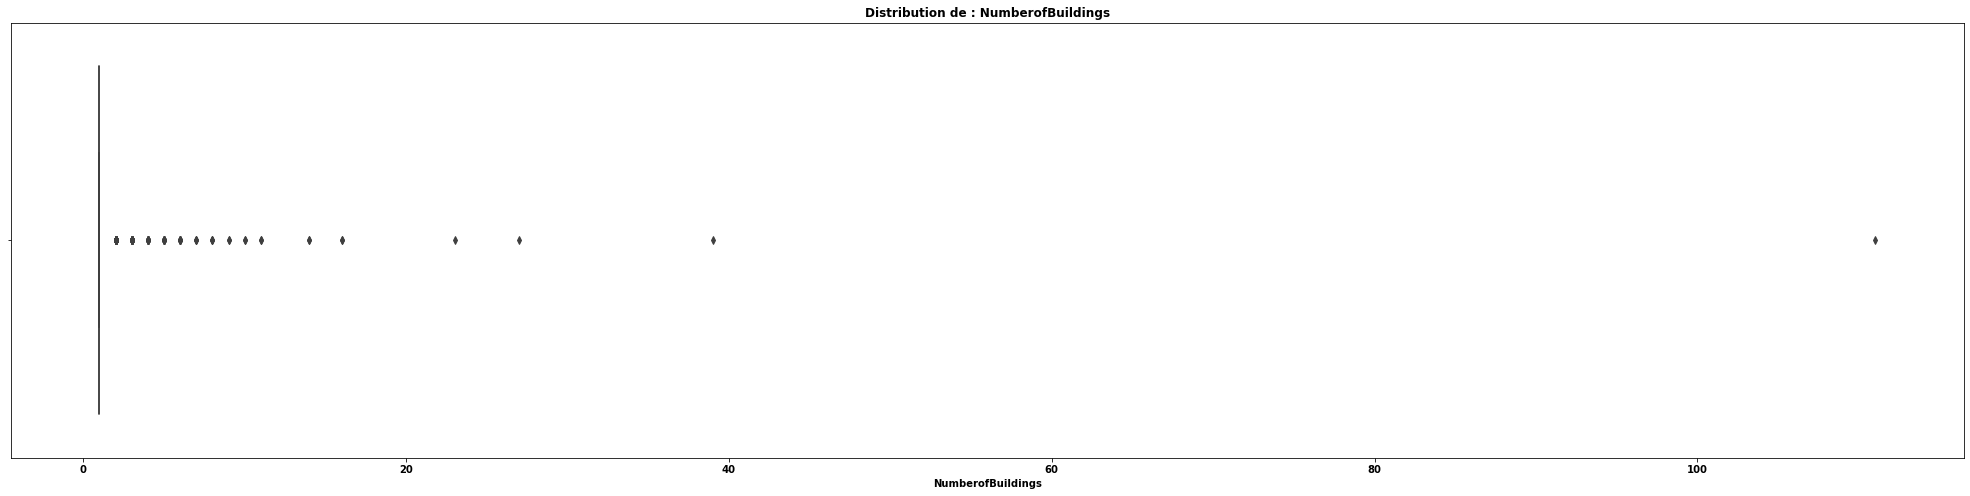

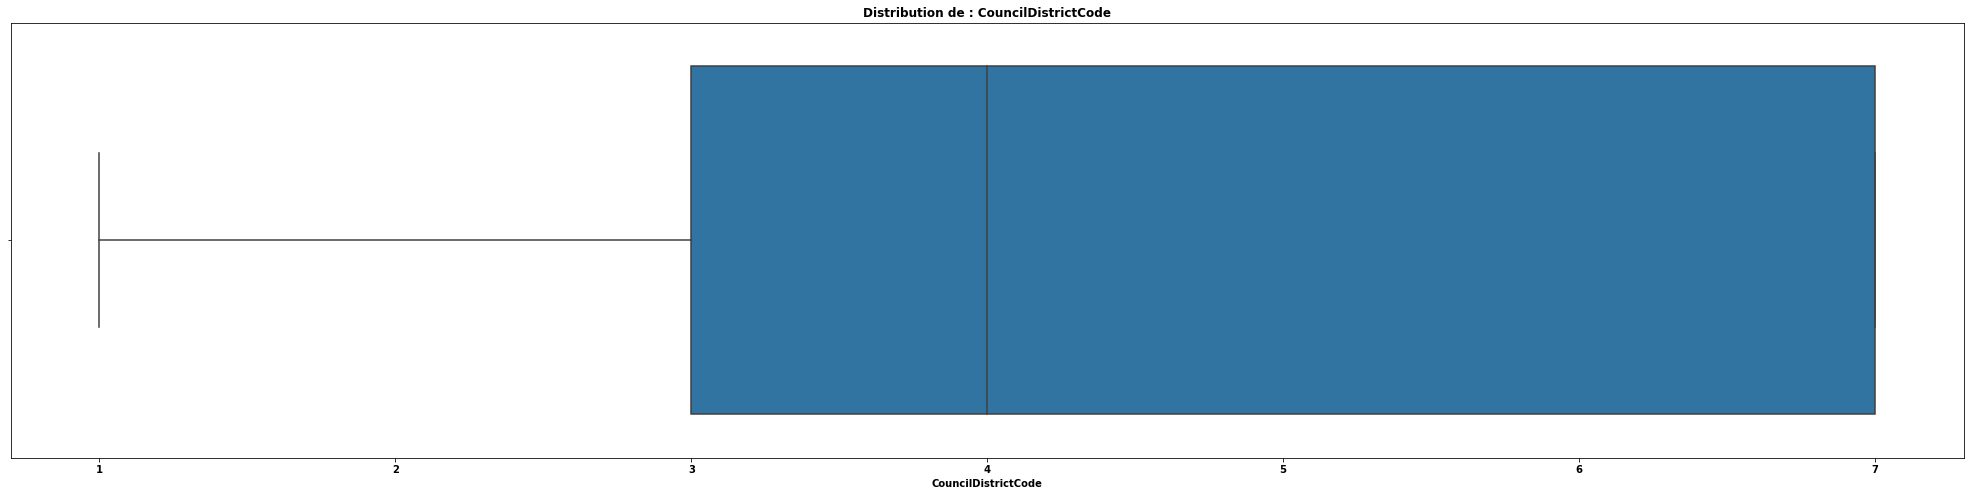

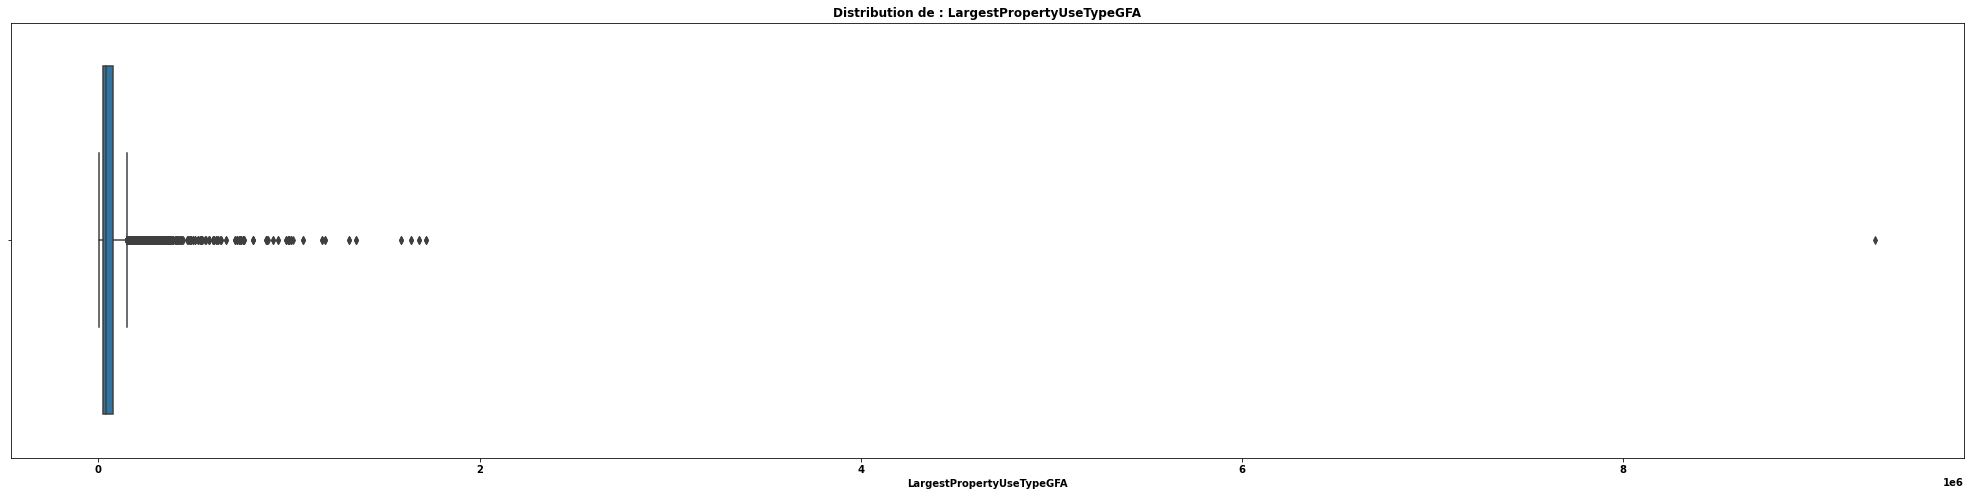

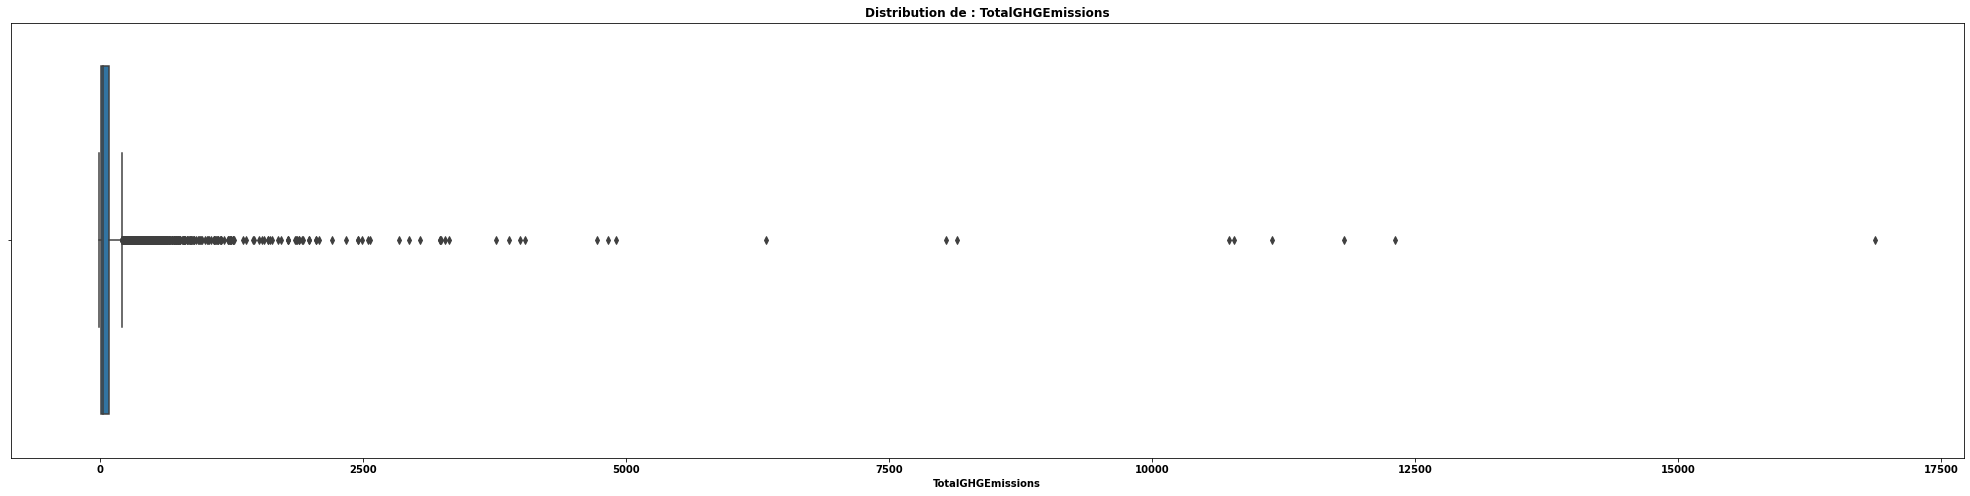

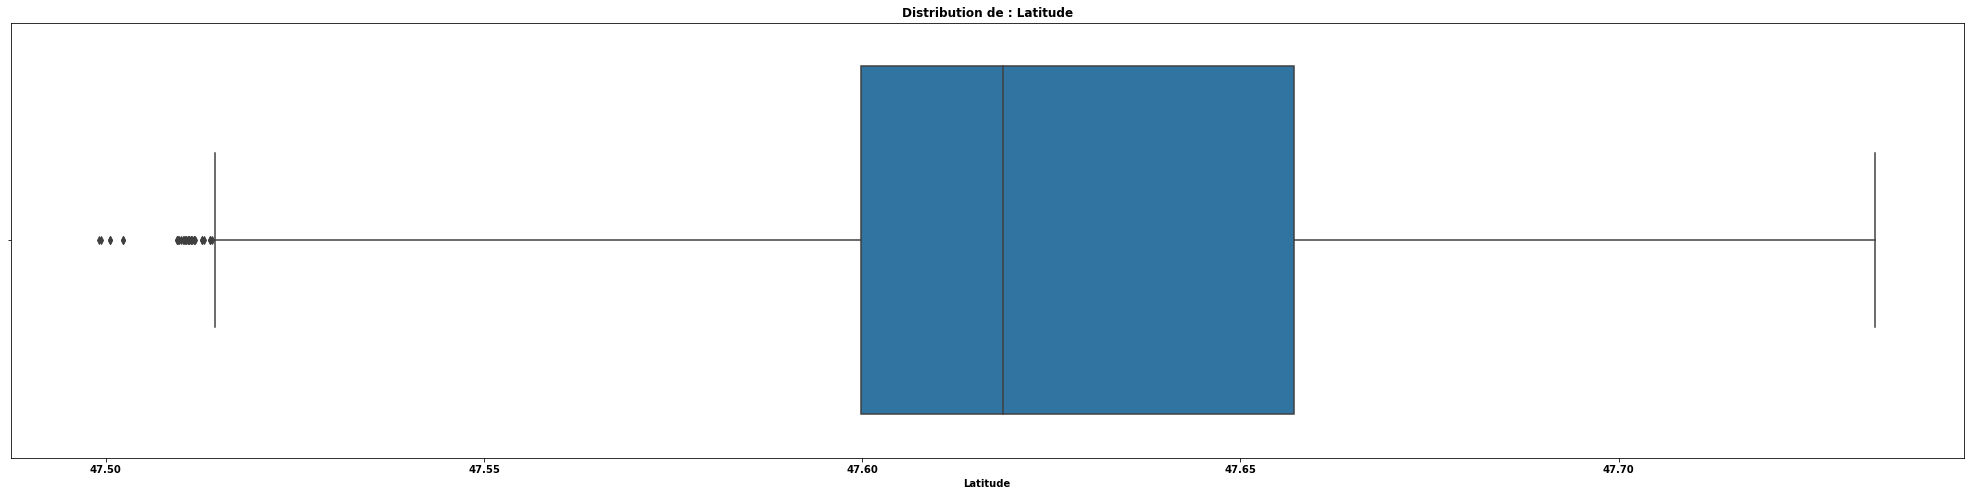

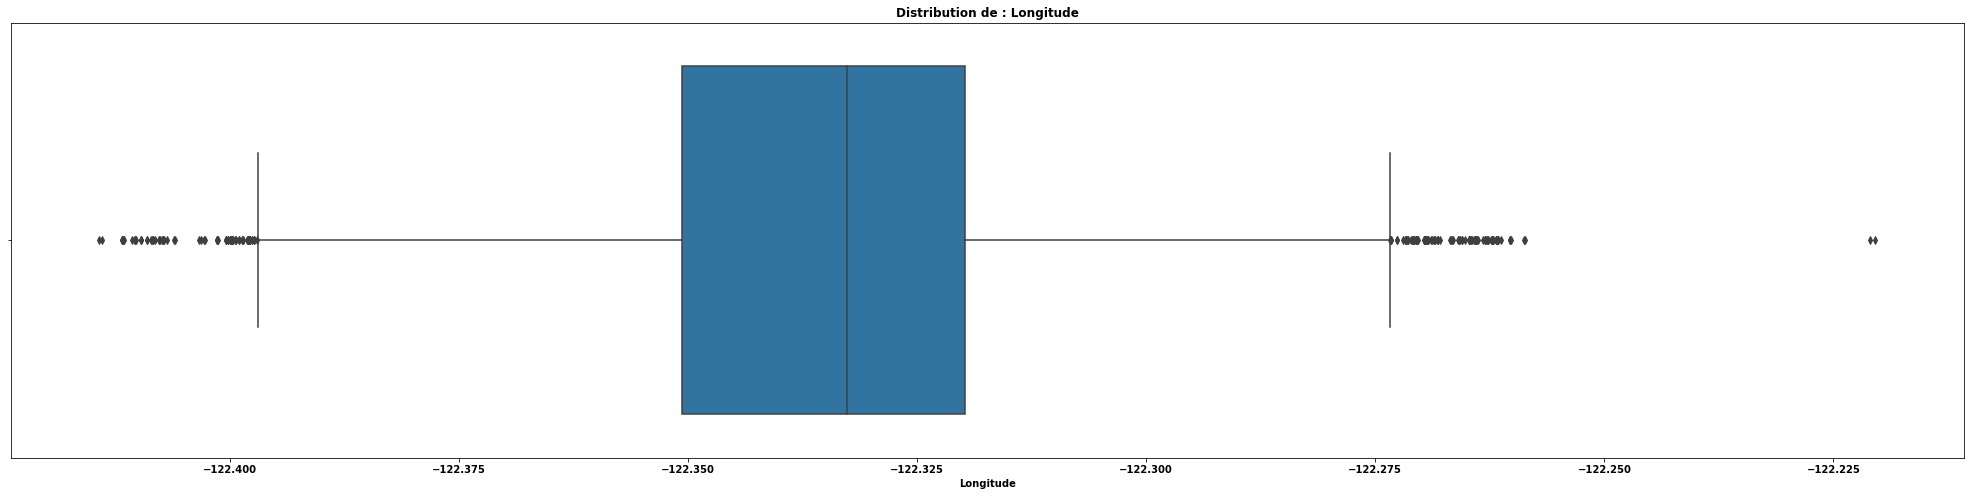

In [42]:
for column in data.select_dtypes(['int64', 'float64']).columns:
    plt.figure(figsize = (35,8))
    
    sns.boxplot(data[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()

# Analyse multivariée

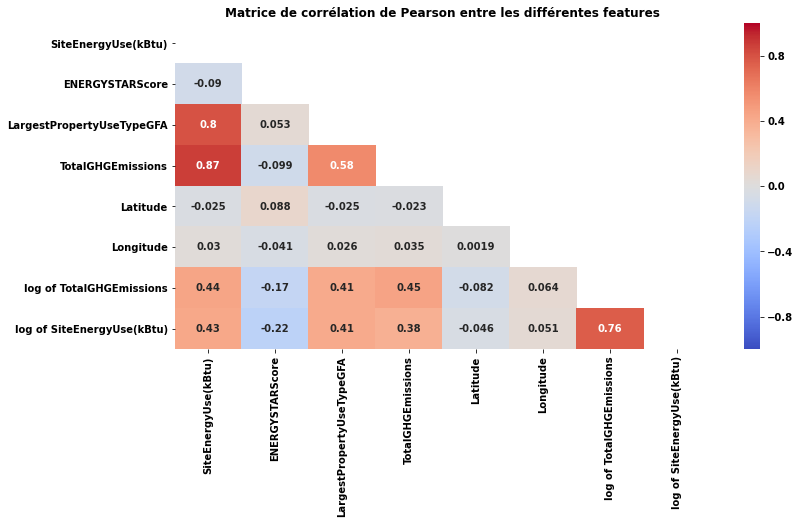

In [55]:
plt.figure(figsize=(12,6))
plt.title('Matrice de corrélation de Pearson entre les différentes features')

corr = data[data.select_dtypes(['float64']).columns].corr() # données quantitatives continues

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

ax = sns.heatmap(corr, annot=True, mask=mask, vmin=-1, cmap='coolwarm')
plt.show()

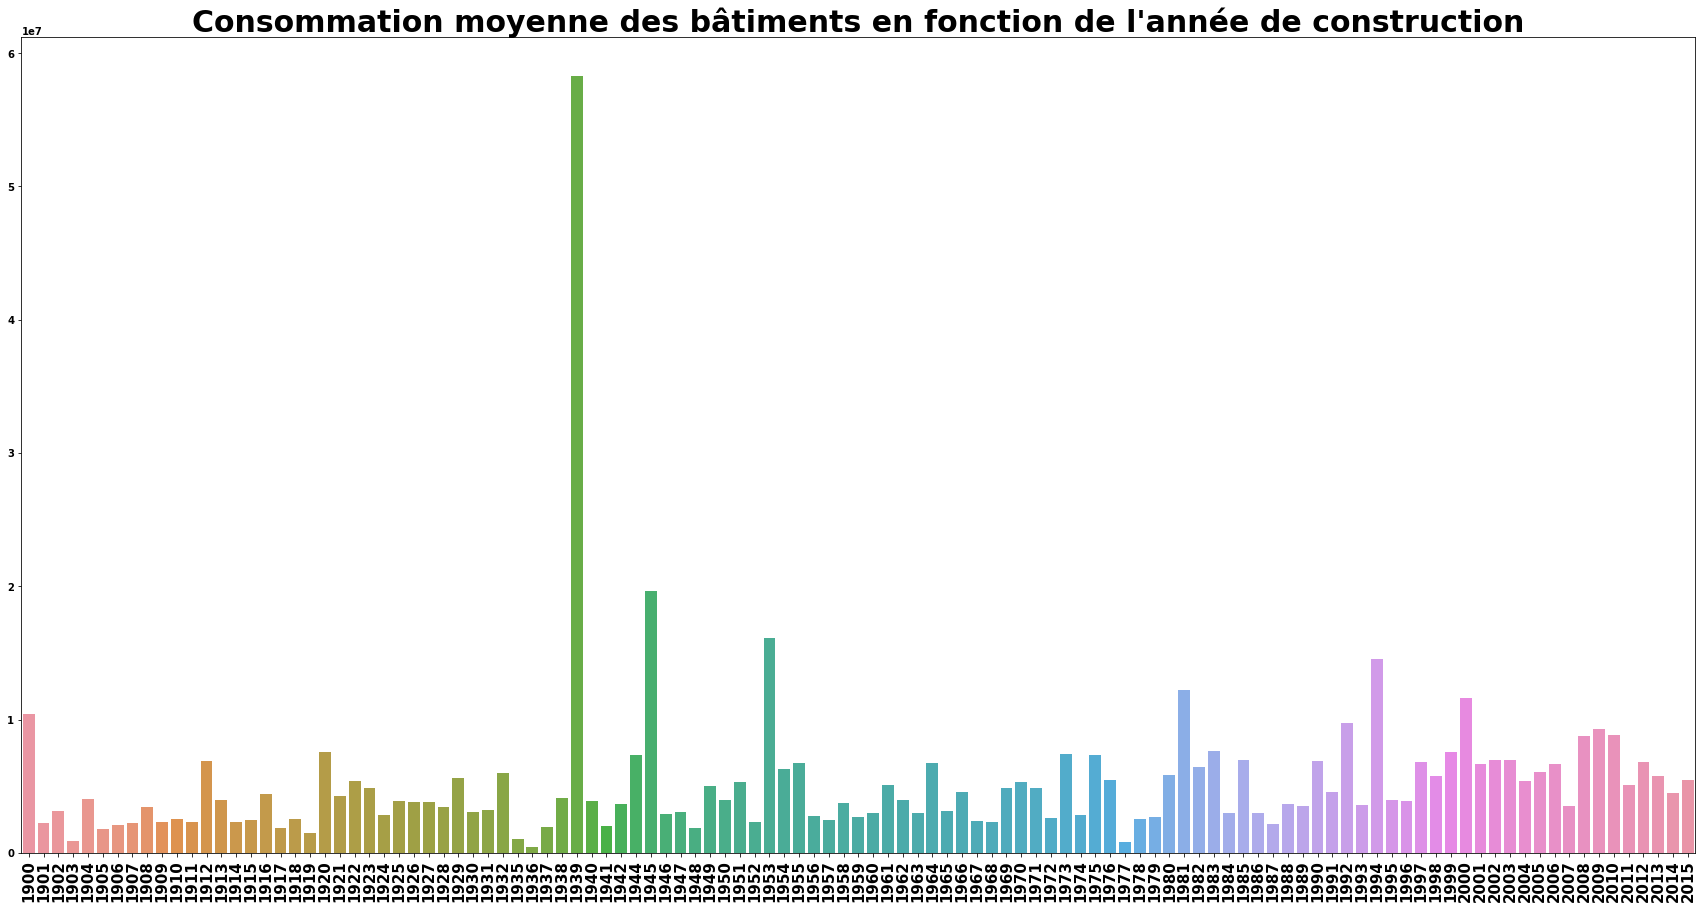

In [44]:
df=data.groupby('YearBuilt', as_index=False)['SiteEnergyUse(kBtu)'].mean()

plt.figure(figsize=(30,15))
plt.title('Consommation moyenne des bâtiments en fonction de l\'année de construction',fontsize=30)
plt.xticks(rotation=90,fontsize=15)
sns.barplot(x=df['YearBuilt'].values, y=df['SiteEnergyUse(kBtu)'].values)
plt.show()

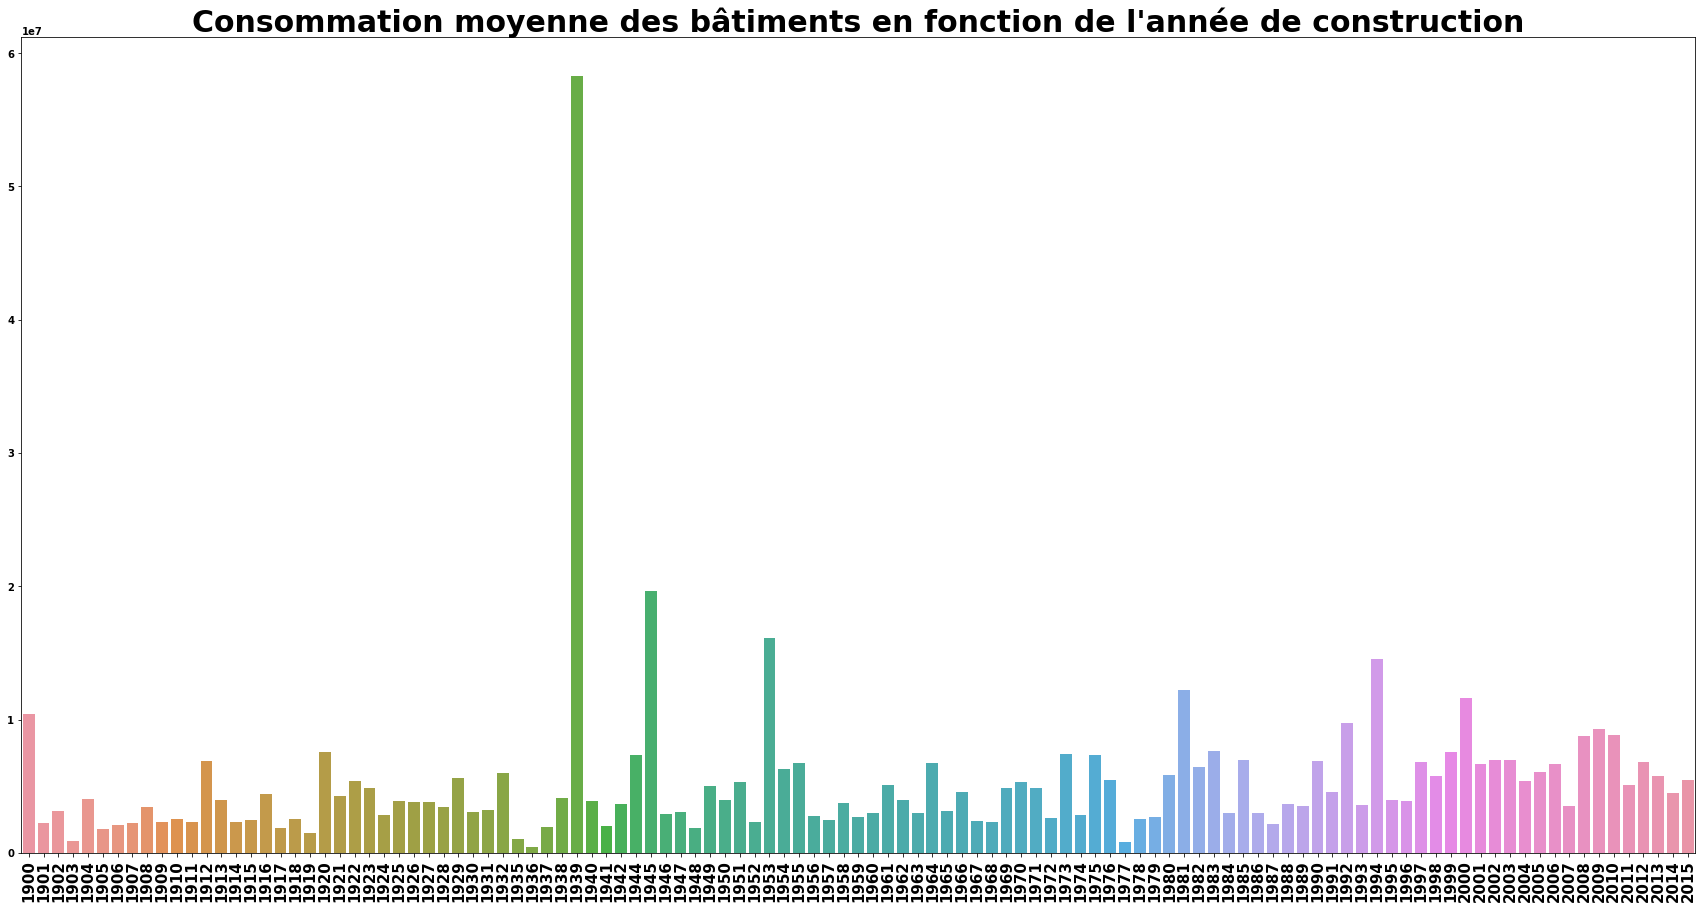

In [45]:
plt.figure(figsize=(30,15))
plt.title('Consommation moyenne des bâtiments en fonction de l\'année de construction',fontsize=30)
plt.xticks(rotation=90,fontsize=15)
sns.barplot(x=df['YearBuilt'].values, y=df['SiteEnergyUse(kBtu)'].values)
plt.show()

# Analyse des données cible (émissions de CO2, conso. totale d'énergie) 

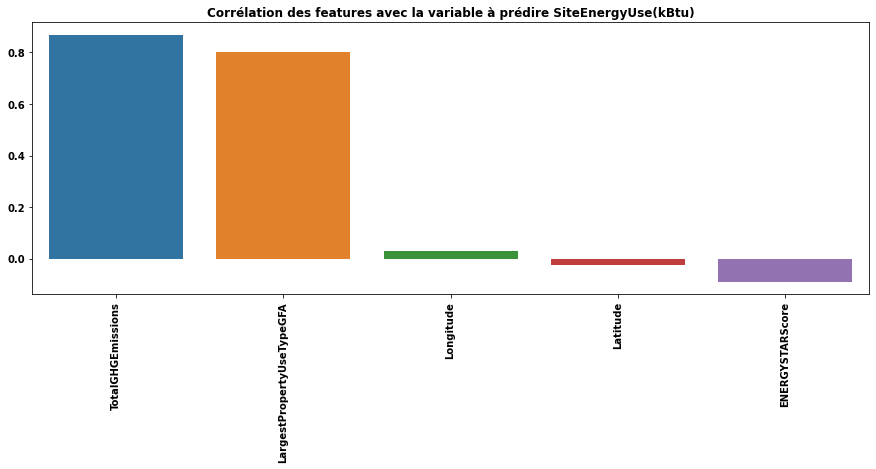

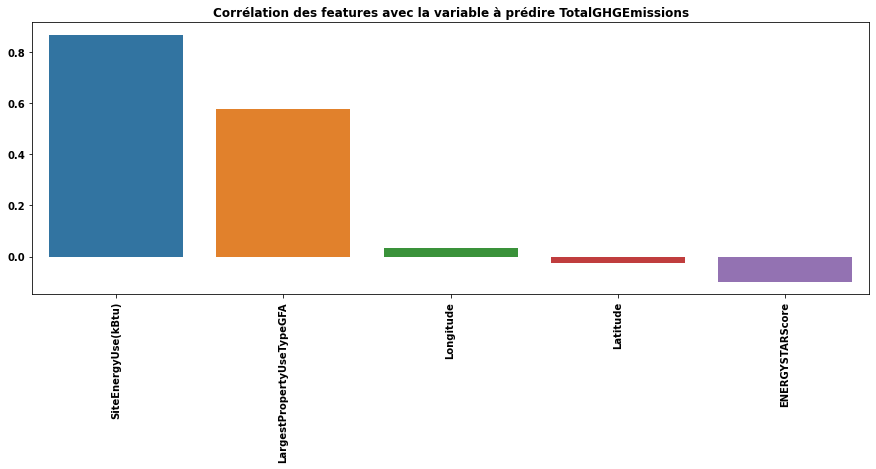

In [46]:
to_predict=['SiteEnergyUse(kBtu)','TotalGHGEmissions']

for var in to_predict:
    corr_to_var=corr[var].drop(labels=[var]).sort_values(ascending=False)

    plt.figure(figsize=(15,5))
    plt.title('Corrélation des features avec la variable à prédire ' + var)
    plt.xticks(rotation=90)
    sns.barplot(x=corr_to_var.index, y=corr_to_var.values)
    plt.show()

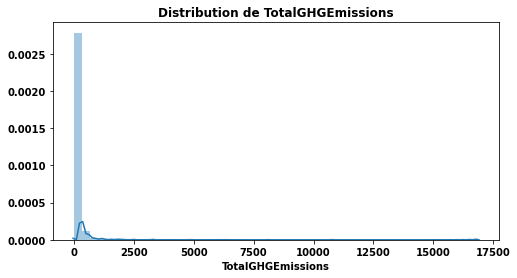

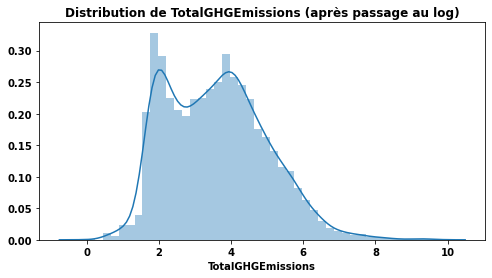

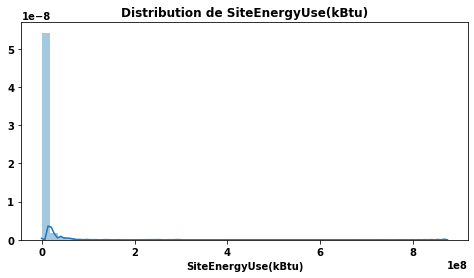

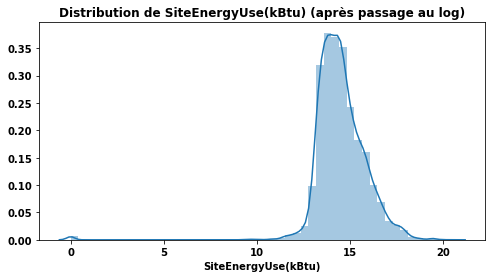

In [47]:
cibles=['TotalGHGEmissions','SiteEnergyUse(kBtu)']

for cible in cibles:
    data_cible=data[cible].dropna()
    
    plt.figure(figsize=(8,4))
    plt.title('Distribution de ' + cible)
    sns.distplot(data_cible)
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.title('Distribution de ' + cible + ' (après passage au log)')
    mini=data_cible.min()
    if mini<=0:
        data_log = np.log1p(-mini+data_cible)
    else:
        data_log = np.log1p(data_cible)
    sns.distplot(data_log)
    plt.show()
    
    if(cible!=cibles[-1]):
        print('\n\n\n\n\n\n\n\n\n\n')

In [48]:
# On préférera utiliser le log des cibles car valeurs plus petites et distribution 'normale'
for cible in cibles:
    data_cible=data[cible]
    
    mini=data[cible].min()
    if mini<=0:
        data_log = np.log1p(-mini+data_cible)
    else:
        data_log = np.log1p(data_cible)
        
    data['log of ' + cible] = data_log

In [49]:
data

,PropertyGFATotal,ComplianceStatus,LargestPropertyUseType,DataYear,SiteEnergyUse(kBtu),YearBuilt,ENERGYSTARScore,NumberofFloors,Outlier,NumberofBuildings,CouncilDistrictCode,Neighborhood,BuildingType,LargestPropertyUseTypeGFA,TotalGHGEmissions,Latitude,Longitude,log of TotalGHGEmissions,log of SiteEnergyUse(kBtu)
OSEBuildingID,,,,,,,,,,,,,,,,,,,
1,88434,Compliant,Hotel,2015,6981428.000,1927,65.0,12,No,1,7,DOWNTOWN,NonResidential,88434.0,249.43,47.612190,-122.337997,5.526369,15.758764
24746,63998,Compliant,Senior Care Community,2015,4107827.000,1988,47.0,4,No,1,3,CENTRAL,Multifamily LR (1-4),63998.0,147.69,47.618052,-122.309796,5.007230,15.228405
24750,24084,Compliant,Low-Rise Multifamily,2015,632932.000,1920,85.0,3,No,1,3,CENTRAL,Multifamily LR (1-4),24084.0,15.24,47.618724,-122.309219,2.835564,13.358120
24752,439604,Compliant,Multifamily Housing,2015,5903033.000,2004,99.0,6,No,1,3,CENTRAL,Multifamily MR (5-9),186618.0,167.31,47.617957,-122.302882,5.130549,15.590977
24758,24248,Compliant,Self-Storage Facility,2015,108795.000,1962,NaN,1,No,1,3,CENTRAL,NonResidential,21018.0,0.78,47.612465,-122.316296,0.947789,11.597230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20985,26400,Compliant,Other - Recreation,2016,452612.500,1970,NaN,1,No,1,2,GREATER DUWAMISH,NonResidential,20560.0,3.16,47.551680,-122.324590,1.601406,13.022794
20986,27680,Compliant,Non-Refrigerated Warehouse,2016,1778431.750,1968,NaN,1,No,1,2,GREATER DUWAMISH,NonResidential,25000.0,64.81,47.550490,-122.323820,4.198855,14.391243
20987,25872,Compliant,Office,2016,1787119.000,1969,NaN,2,No,1,2,GREATER DUWAMISH,NonResidential,23272.0,45.79,47.551450,-122.326350,3.862623,14.396116


In [50]:
#one hot encoding

categorical=data.select_dtypes(['object']).columns
data_categorical=data[categorical]

data_OHE=pd.get_dummies(data_categorical)
data.drop(columns=categorical,inplace=True)
data=pd.concat([data,data_OHE],axis=1)

In [51]:
data

,PropertyGFATotal,DataYear,SiteEnergyUse(kBtu),YearBuilt,ENERGYSTARScore,NumberofFloors,NumberofBuildings,CouncilDistrictCode,LargestPropertyUseTypeGFA,TotalGHGEmissions,Latitude,Longitude,log of TotalGHGEmissions,log of SiteEnergyUse(kBtu),ComplianceStatus_Compliant,ComplianceStatus_Not Compliant,ComplianceStatus_Unknown,LargestPropertyUseType_Adult Education,LargestPropertyUseType_Automobile Dealership,LargestPropertyUseType_Bank Branch,LargestPropertyUseType_College/University,LargestPropertyUseType_Convention Center,LargestPropertyUseType_Courthouse,LargestPropertyUseType_Data Center,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Financial Office,LargestPropertyUseType_Fire Station,LargestPropertyUseType_Fitness Center/Health Club/Gym,LargestPropertyUseType_Food Service,LargestPropertyUseType_High-Rise Multifamily,LargestPropertyUseType_Hospital,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Large Office,LargestPropertyUseType_Library,LargestPropertyUseType_Lifestyle Center,LargestPropertyUseType_Low-Rise Multifamily,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Mid-Rise Multifamily,LargestPropertyUseType_Mixed Use Property,LargestPropertyUseType_Movie Theater,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Museum,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Other - Education,LargestPropertyUseType_Other - Entertainment/Public Assembly,LargestPropertyUseType_Other - Lodging/Residential,LargestPropertyUseType_Other - Mall,LargestPropertyUseType_Other - Public Services,LargestPropertyUseType_Other - Recreation,LargestPropertyUseType_Other - Restaurant/Bar,LargestPropertyUseType_Other - Services,LargestPropertyUseType_Other - Utility,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Outpatient Rehabilitation/Physical Therapy,LargestPropertyUseType_Parking,LargestPropertyUseType_Performing Arts,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Pre-school/Daycare,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,"LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Residential Care Facility,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_SPS-District K-12,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Small- and Mid-Sized Office,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,Outlier_High Outlier,Outlier_Low Outlier,Outlier_No,Neighborhood_BALLARD,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,88434,2015,6981428.000,1927,65.0,12,1,7,88434.0,249.43,47.612190,-122.337997,5.526369,15.758764,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,

In [52]:
data.dtypes

PropertyGFATotal                     int64  
DataYear                             int64  
SiteEnergyUse(kBtu)                  float64
YearBuilt                            int64  
ENERGYSTARScore                      float64
                                      ...   
BuildingType_Multifamily MR (5-9)    uint8  
BuildingType_NonResidential          uint8  
BuildingType_Nonresidential COS      uint8  
BuildingType_Nonresidential WA       uint8  
BuildingType_SPS-District K-12       uint8  
Length: 106, dtype: object

In [53]:
data.describe()

,PropertyGFATotal,DataYear,SiteEnergyUse(kBtu),YearBuilt,ENERGYSTARScore,NumberofFloors,NumberofBuildings,CouncilDistrictCode,LargestPropertyUseTypeGFA,TotalGHGEmissions,Latitude,Longitude,log of TotalGHGEmissions,log of SiteEnergyUse(kBtu),ComplianceStatus_Compliant,ComplianceStatus_Not Compliant,ComplianceStatus_Unknown,LargestPropertyUseType_Adult Education,LargestPropertyUseType_Automobile Dealership,LargestPropertyUseType_Bank Branch,LargestPropertyUseType_College/University,LargestPropertyUseType_Convention Center,LargestPropertyUseType_Courthouse,LargestPropertyUseType_Data Center,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Financial Office,LargestPropertyUseType_Fire Station,LargestPropertyUseType_Fitness Center/Health Club/Gym,LargestPropertyUseType_Food Service,LargestPropertyUseType_High-Rise Multifamily,LargestPropertyUseType_Hospital,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Large Office,LargestPropertyUseType_Library,LargestPropertyUseType_Lifestyle Center,LargestPropertyUseType_Low-Rise Multifamily,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Mid-Rise Multifamily,LargestPropertyUseType_Mixed Use Property,LargestPropertyUseType_Movie Theater,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Museum,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Other - Education,LargestPropertyUseType_Other - Entertainment/Public Assembly,LargestPropertyUseType_Other - Lodging/Residential,LargestPropertyUseType_Other - Mall,LargestPropertyUseType_Other - Public Services,LargestPropertyUseType_Other - Recreation,LargestPropertyUseType_Other - Restaurant/Bar,LargestPropertyUseType_Other - Services,LargestPropertyUseType_Other - Utility,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Outpatient Rehabilitation/Physical Therapy,LargestPropertyUseType_Parking,LargestPropertyUseType_Performing Arts,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Pre-school/Daycare,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,"LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Residential Care Facility,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_SPS-District K-12,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Small- and Mid-Sized Office,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,Outlier_High Outlier,Outlier_Low Outlier,Outlier_No,Neighborhood_BALLARD,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12
count,6.700000e+03,6700.000000,6.690000e+03,6700.000000,5090.000000,6700.000000,6700.000000,6700.000000,6.700000e+03,6689.000000,6700.000000,6700.000000,6689.000000,6690.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.00

In [54]:
data.to_csv('2015-2016-building-energy-benchmarking.csv')